In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 1
!hostname
!pwd

dv001.ib.bridges2.psc.edu
/ocean/projects/asc170022p/mtragoza/mre-pinn/MICCAI-2023


In [2]:
import sys, os, pathlib
import numpy as np
import xarray as xr
import torch
import matplotlib.pyplot as plt
import seaborn as sns

os.environ['DDEBACKEND'] = 'pytorch'
import deepxde

sys.path.append('..')
%aimport mre_pinn

torch.cuda.is_available()

Using backend: pytorch



True

Loading ../data/BIOQIC/fem_box/100/wave.nc
Loading ../data/BIOQIC/fem_box/100/mre.nc
Loading ../data/BIOQIC/fem_box/100/mre_mask.nc


<IPython.core.display.Javascript object>


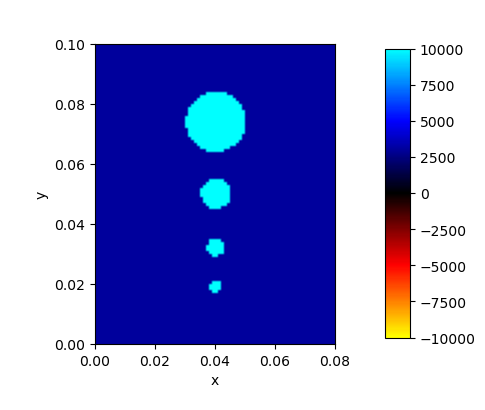

interactive(children=(SelectionSlider(description='part', options=(('abs', 0), ('angle', 1)), value=0), Select…

Evaluating direct baseline


<IPython.core.display.Javascript object>


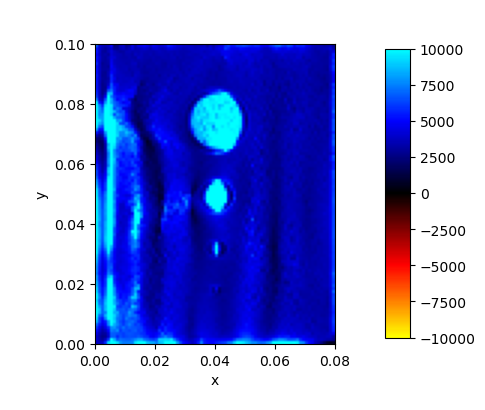

interactive(children=(SelectionSlider(description='part', options=(('abs', 0), ('angle', 1)), value=0), Select…

In [7]:
frequency = 100
example = mre_pinn.data.MREExample.load_xarrays('../data/BIOQIC/fem_box/', frequency) # x z
example.view('mre', ax_height=3, polar=True, vmax=10e3, mask=1)

mre_pinn.baseline.eval_ahi_baseline(example, frequency, savgol_filter=False)
example.view('direct', ax_height=3, polar=True, vmax=10e3, mask=1)

Evaluating FEM baseline
100%|██████████| 10/10 [00:31<00:00,  3.17s/it]


<IPython.core.display.Javascript object>


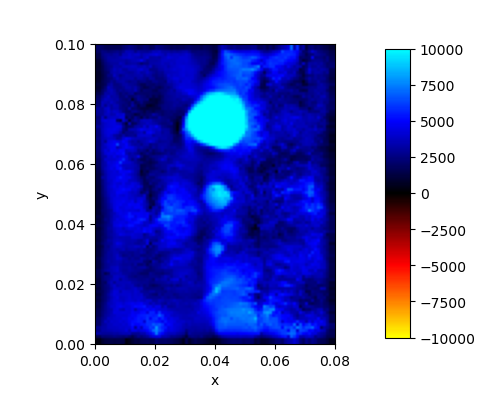

interactive(children=(SelectionSlider(description='part', options=(('abs', 0), ('angle', 1)), value=0), Select…

Evaluating FEM baseline
100%|██████████| 10/10 [00:33<00:00,  3.34s/it]


<IPython.core.display.Javascript object>


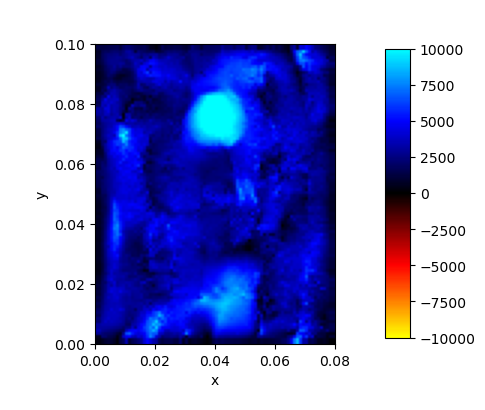

interactive(children=(SelectionSlider(description='part', options=(('abs', 0), ('angle', 1)), value=0), Select…

CPU times: user 4min 5s, sys: 5.78 s, total: 4min 11s
Wall time: 1min 5s


In [8]:
%%time
%autoreload

for hetero in [False, True]:
    mre_pinn.baseline.eval_fem_baseline(
        example,
        frequency,
        u_elem_type='CG-3',
        mu_elem_type='DG-1',
        savgol_filter=False,
        hetero=hetero
    )
    example.view('fem', ax_height=3, polar=True, vmax=10e3, mask=1)

Loading ../data/BIOQIC/phantom/100/wave.nc
Loading ../data/BIOQIC/phantom/100/mre.nc
Loading ../data/BIOQIC/phantom/100/mre_mask.nc


<IPython.core.display.Javascript object>


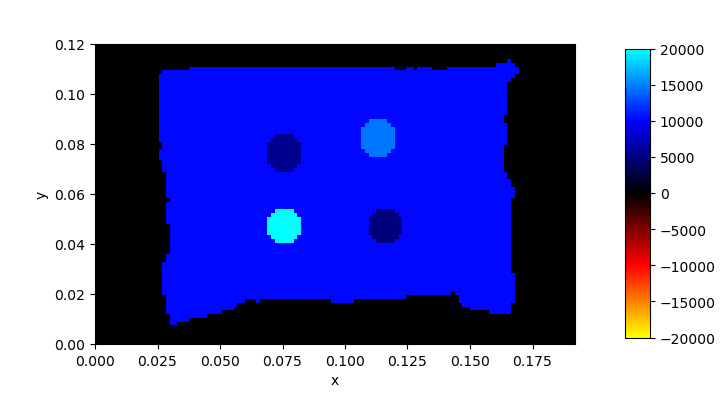

interactive(children=(SelectionSlider(description='part', options=(('abs', 0), ('angle', 1)), value=0), Select…

Evaluating direct baseline


<IPython.core.display.Javascript object>


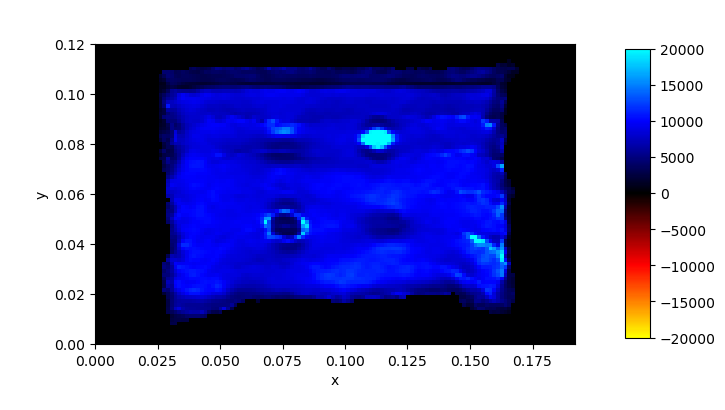

interactive(children=(SelectionSlider(description='part', options=(('abs', 0), ('angle', 1)), value=0), Select…

In [11]:
frequency = 100
example = mre_pinn.data.MREExample.load_xarrays('../data/BIOQIC/phantom/', frequency) # x y
example.view('mre', ax_height=3, polar=True, vmax=20e3, mask=1)

mre_pinn.baseline.eval_ahi_baseline(example, frequency, savgol_filter=False)
example.view('direct', ax_height=3, polar=True, vmax=20e3, mask=1)

Evaluating FEM baseline
100%|██████████| 25/25 [01:18<00:00,  3.16s/it]


<IPython.core.display.Javascript object>


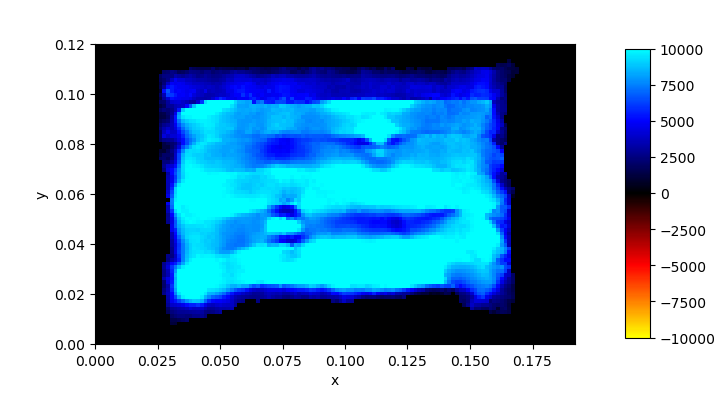

interactive(children=(SelectionSlider(description='part', options=(('abs', 0), ('angle', 1)), value=0), Select…

Evaluating FEM baseline
100%|██████████| 25/25 [01:25<00:00,  3.42s/it]


<IPython.core.display.Javascript object>


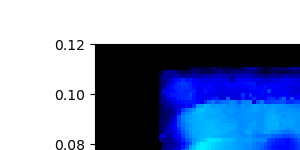

interactive(children=(SelectionSlider(description='part', options=(('abs', 0), ('angle', 1)), value=0), Select…

CPU times: user 10min 7s, sys: 14.2 s, total: 10min 21s
Wall time: 2min 45s


In [12]:
%%time
%autoreload

for hetero in [False, True]:
    mre_pinn.baseline.eval_fem_baseline(
        example,
        frequency,
        u_elem_type='CG-3',
        mu_elem_type='DG-1',
        savgol_filter=False,
        hetero=hetero
    )
    example.view('fem', ax_height=3, polar=True, vmax=10e3, mask=1)

In [ ]:
frequency = 40
example = mre_pinn.data.MREExample.load_xarrays('../data/NAFLD/v3/', '0006') # x